In [37]:
import pandas as pd
from pathlib import Path
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.gridspec import GridSpec


from torchvision import transforms
from torchvision.transforms import v2

from beardetection.data.utils import load_datasplit

In [11]:
datasplit_filepath = Path("../../data/04_feature/beardetection/split/data_split.csv")
df_split = load_datasplit(datasplit_filepath)
df_other = df_split[df_split["class"] == "other"]

df_split.head()

,Unnamed: 0,label_filepath,class,image_filepath,exif,year,month,day,hour,minute,camera_id,split
0,303,data/04_feature/beardetection/bearbody/HackThe...,bear,data/01_raw/Hack the Planet/images/Season2 - b...,"{'ResolutionUnit': 2, 'ExifOffset': 232, 'Make...",2024,3,14,19,28,CC010Y,train
1,304,data/04_feature/beardetection/bearbody/HackThe...,bear,data/01_raw/Hack the Planet/images/Season2 - b...,"{'ResolutionUnit': 2, 'ExifOffset': 232, 'Make...",2024,3,14,19,28,CC010Y,train
2,305,data/04_feature/beardetection/bearbody/HackThe...,bear,data/01_raw/Hack the Planet/images/Season2 - b...,"{'ResolutionUnit': 2, 'ExifOffset': 232, 'Make...",2024,3,14,19,25,CC010Y,train
3,306,data/04_feature/beardetection/bearbody/HackThe...,bear,data/01_raw/Hack the Planet/images/Season2 - b...,"{'ResolutionUnit': 2, 'ExifOffset': 232, 'Make...",2024,3,14,19,27,CC010Y,train
4,911,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train


In [13]:
df_other.head()

,Unnamed: 0,label_filepath,class,image_filepath,exif,year,month,day,hour,minute,camera_id,split
4,911,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train
5,919,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train
6,937,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train
7,989,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train
8,1058,None,other,data/01_raw/Hack the Planet/images/Season1 - a...,"{'GPSInfo': 42468, 'ResolutionUnit': 2, 'ExifO...",2024,3,14,12,25,STRAMBA_Bushnell_CC00YA,train


In [24]:
idx = 0
df_row = df_other.sample()

image_filepath = Path("../../") / df_row.iloc[0]["image_filepath"]
image = Image.open(image_filepath)
image_filepath

PosixPath('../../data/01_raw/Hack the Planet/images/Season2 - animals only/22RucarAG/135_Preajba/20190204_20190318/Cudde_CC06M2/I_00031a.JPG')

In [178]:
def augment(image, min_size: int = 1024) -> list:
    """
    Augments the PIL image and returns 10 variations of the input image.
    """
    W, H = image.size
    dim = max(min_size, min(int(H / 2), int(W / 2)))
    transform = v2.TenCrop((dim, dim))
    return list(transform(image))

In [174]:
augmented_images = augment(image)

In [175]:
def display_images(images: list) -> None:
    n = len(images)
    fig, axs = plt.subplots(1, len(images), figsize=figsize)
    for i, img in enumerate(images):
        ax = axs[i]
        ax.set_axis_off()
        ax.imshow(img)
    plt.show()

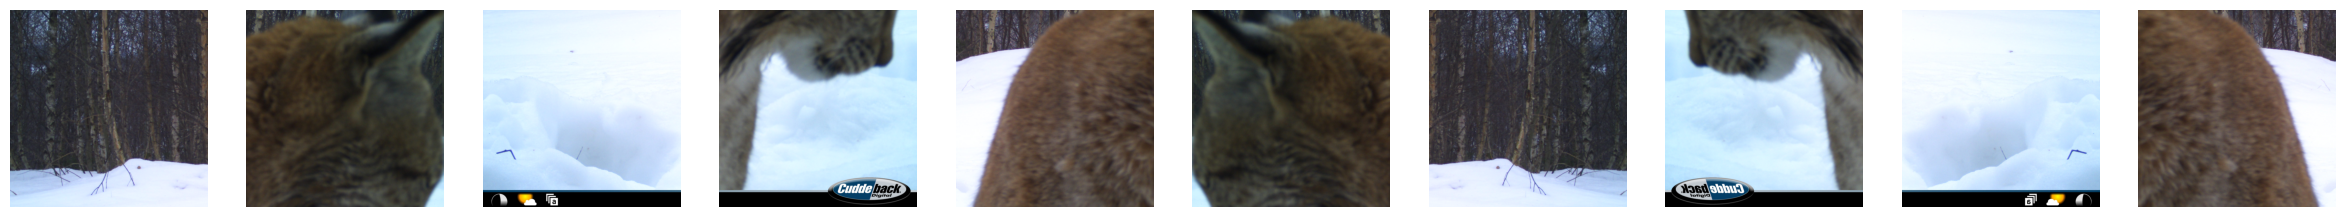

In [176]:
display_images(augmented_images)